# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

2025-03-04 03:00:42.537937: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# your code here
df = pd.read_csv("tic-tac-toe.csv")

In [3]:
df

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,False
954,o,x,o,x,x,o,x,o,x,False
955,o,x,o,x,o,x,x,o,x,False
956,o,x,o,o,x,x,x,o,x,False


In [4]:
df.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TL      958 non-null    object
 1   TM      958 non-null    object
 2   TR      958 non-null    object
 3   ML      958 non-null    object
 4   MM      958 non-null    object
 5   MR      958 non-null    object
 6   BL      958 non-null    object
 7   BM      958 non-null    object
 8   BR      958 non-null    object
 9   class   958 non-null    bool  
dtypes: bool(1), object(9)
memory usage: 68.4+ KB


In [6]:
df.columns

Index(['TL', 'TM', 'TR', 'ML', 'MM', 'MR', 'BL', 'BM', 'BR', 'class'], dtype='object')

In [7]:
df.describe()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
count,958,958,958,958,958,958,958,958,958,958
unique,3,3,3,3,3,3,3,3,3,2
top,x,x,x,x,x,x,x,x,x,True
freq,418,378,418,378,458,378,418,378,418,626


In [8]:
df.shape

(958, 10)

In [9]:
df.isnull().sum()

TL       0
TM       0
TR       0
ML       0
MM       0
MR       0
BL       0
BM       0
BR       0
class    0
dtype: int64

In [11]:
# Convert categorical columns to category type
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category').cat.codes

# One-hot encode
df_encoded = pd.get_dummies(df, drop_first=True)

In [12]:
print(df.dtypes)


TL       int8
TM       int8
TR       int8
ML       int8
MM       int8
MR       int8
BL       int8
BM       int8
BR       int8
class    bool
dtype: object


In [14]:
#Separate the inputs and output.
data_columns = df.columns
X = df[data_columns[data_columns != 'class']] # all columns except class
y = df["class"]


In [15]:
X.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR
0,2,2,2,2,1,1,2,1,1
1,2,2,2,2,1,1,1,2,1
2,2,2,2,2,1,1,1,1,2
3,2,2,2,2,1,1,1,0,0
4,2,2,2,2,1,1,0,1,0


In [16]:
y.head()

0    True
1    True
2    True
3    True
4    True
Name: class, dtype: bool

In [17]:
# Normalize input data using MinMaxScaler (scales values between 0 and 1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

/Users/la/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/la/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/la/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/la/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

array([[1. , 1. , 1. , ..., 1. , 0.5, 0.5],
       [1. , 1. , 1. , ..., 0.5, 1. , 0.5],
       [1. , 1. , 1. , ..., 0.5, 0.5, 1. ],
       ...,
       [0.5, 1. , 0.5, ..., 1. , 0.5, 1. ],
       [0.5, 1. , 0.5, ..., 1. , 0.5, 1. ],
       [0.5, 0.5, 1. , ..., 0.5, 1. , 1. ]])

## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [18]:
# your code here
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (766, 9)
Training labels shape: (766,)
Test data shape: (192, 9)
Test labels shape: (192,)


In [20]:
X_train.shape[1]

9

In [21]:
len(y_train.unique())

2

In [22]:
def create_model(): 
    model = Sequential()
    model.add(Dense(18, activation='relu', input_shape=(9,)))
    model.add(Dropout(0.2))
    model.add(Dense(9, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    # define the optimizer
    optimizer = Adam(learning_rate=0.001)
    # compile the model
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model
    

In [23]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                180       
                                                                 
 dropout (Dropout)           (None, 18)                0         
                                                                 
 dense_1 (Dense)             (None, 9)                 171       
                                                                 
 dropout_1 (Dropout)         (None, 9)                 0         
                                                                 
 dense_2 (Dense)             (None, 2)                 20        
                                                                 
Total params: 371 (1.45 KB)
Trainable params: 371 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping]
                    )

Epoch 1/20
24/24 [==============================] - 1s 8ms/step - loss: 0.7159 - accuracy: 0.4843 - val_loss: 0.6679 - val_accuracy: 0.5938
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5809 - val_loss: 0.6520 - val_accuracy: 0.6458
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.6175 - val_loss: 0.6477 - val_accuracy: 0.6562
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 0.6604 - accuracy: 0.6305 - val_loss: 0.6439 - val_accuracy: 0.6667
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.6475 - val_loss: 0.6409 - val_accuracy: 0.6510
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 0.6510 - accuracy: 0.6501 - val_loss: 0.6393 - val_accuracy: 0.6510
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.6514 - val_loss: 0.6380 - val_accuracy: 0.6510
Epoch 8/20
24/24 [==

Test loss: 0.6278883814811707
Test accuracy: 0.6510416865348816


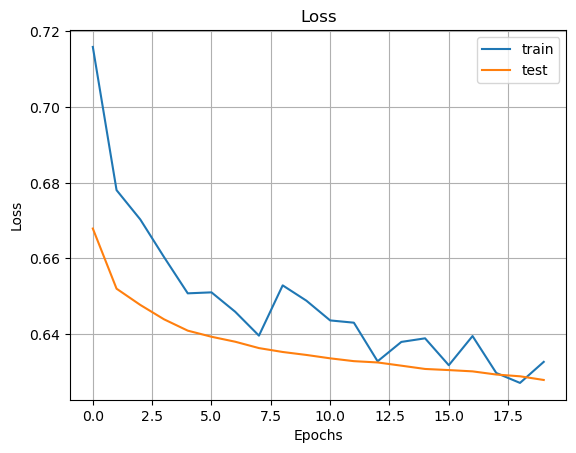

In [25]:
from matplotlib import pyplot as plt
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True);
plt.show()

In [26]:
# Save the model to a file named 'tic-tac-toe.model'
model.save('tic-tac-toe.model')


INFO:tensorflow:Assets written to: tic-tac-toe.model/assets


INFO:tensorflow:Assets written to: tic-tac-toe.model/assets


## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [27]:
# your code here
# Load the saved model
tic_model = load_model('tic-tac-toe.model')

In [34]:
def format_board(board):
    """
    Convert the numerical board representation into a readable Tic-Tac-Toe grid.
    1 = 'x', 0.5 = 'o', 0 = 'b' (empty).
    """
    formatted_board = []
    for value in board:
        if value == 1.0:
            formatted_board.append('x')
        elif value == 0.5:
            formatted_board.append('o')
        else:
            formatted_board.append('b')
    
    # Create a 3x3 grid representation
    return f"{formatted_board[0]} | {formatted_board[1]} | {formatted_board[2]}\n" \
           f"---------\n" \
           f"{formatted_board[3]} | {formatted_board[4]} | {formatted_board[5]}\n" \
           f"---------\n" \
           f"{formatted_board[6]} | {formatted_board[7]} | {formatted_board[8]}"



In [35]:
# Select 5 random rows by position (not index label)
random_indices = random.sample(range(len(X_test)), 5)

# Use standard array indexing to select rows
random_samples = X_test[random_indices]


In [38]:
# Make predictions on the random samples
predictions = model.predict(random_samples)

# Get the predicted classes (0 = O wins/draw, 1 = X wins)
predicted_classes = np.argmax(predictions, axis=1)

# Display the predictions and compare with actual results
# Display the predictions and compare with actual results
for i, index in enumerate(random_indices):
    board_state = X_test[index]  # Get the board state for this sample
    formatted_board = format_board(board_state)  # Convert to readable format
    
    print(f"Game {i+1} (Board State):")
    print(formatted_board)  # Display the board as a grid
    print(f"Predicted: {'Player X wins' if predicted_classes[i] == 1 else 'Player O wins or Draw'}")
    print(f"Actual: {'Player X wins' if y_test.iloc[index] == 1 else 'Player O wins or Draw'}")
    print("-" * 50)

1/1 [==============================] - 0s 21ms/step
Game 1 (Board State):
o | x | o
---------
x | x | x
---------
o | b | b
Predicted: Player X wins
Actual: Player X wins
--------------------------------------------------
Game 2 (Board State):
x | o | x
---------
x | o | x
---------
o | o | b
Predicted: Player X wins
Actual: Player O wins or Draw
--------------------------------------------------
Game 3 (Board State):
o | b | x
---------
x | o | b
---------
x | b | o
Predicted: Player X wins
Actual: Player O wins or Draw
--------------------------------------------------
Game 4 (Board State):
x | b | x
---------
o | o | o
---------
b | b | x
Predicted: Player X wins
Actual: Player O wins or Draw
--------------------------------------------------
Game 5 (Board State):
o | b | o
---------
x | x | o
---------
x | x | o
Predicted: Player X wins
Actual: Player O wins or Draw
--------------------------------------------------


## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [105]:
# your code here
from tensorflow.keras.layers import BatchNormalization
def create_improved_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(9,)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    optimizer = Adam(learning_rate=0.0005)
    # Compile the model
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [110]:
model_improved = create_improved_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model_improved.fit(X_train, y_train, 
                    batch_size=32, 
                    epochs=100,  # Increase epochs
                    verbose=1, 
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])


Epoch 1/100
24/24 [==============================] - 1s 8ms/step - loss: 0.7180 - accuracy: 0.5849 - val_loss: 0.6596 - val_accuracy: 0.6510
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6745 - accuracy: 0.6266 - val_loss: 0.6623 - val_accuracy: 0.6562
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6602 - accuracy: 0.6462 - val_loss: 0.6550 - val_accuracy: 0.6719
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6350 - accuracy: 0.6449 - val_loss: 0.6505 - val_accuracy: 0.6875
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6489 - accuracy: 0.6540 - val_loss: 0.6441 - val_accuracy: 0.7031
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6075 - accuracy: 0.6749 - val_loss: 0.6359 - val_accuracy: 0.6979
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6015 - accuracy: 0.6828 - val_loss: 0.6264 - val_accuracy: 0.7135
Epoch 8/100
2

Test loss: 0.36034366488456726
Test accuracy: 0.8541666865348816


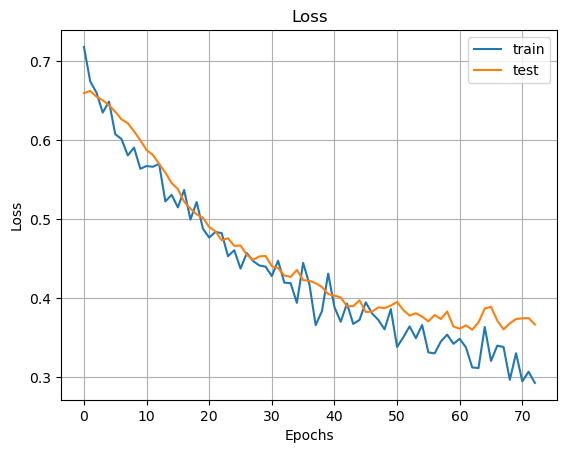

In [111]:
score2 = model_improved.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True);
plt.show()

In [104]:
# Evaluate the model on the test set
test_loss, test_acc = model_improved.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

6/6 [==============================] - 0s 2ms/step - loss: 0.3623 - accuracy: 0.8646
Test accuracy: 0.8645833134651184


**Which approach(es) did you find helpful to improve your model performance?**

In [112]:
# your answer here
print("Adding More Layers and Neurons, and adjusting the Learning Rate,Batch Normalization, Increasing the Number of Epochs.")

Adding More Layers and Neurons, and adjusting the Learning Rate,Batch Normalization, Increasing the Number of Epochs.
